Clément François et Németh Loris

10.03.2025

Signal Processing

# Introduction
Ce travail pratique explore l'utilisation de Python et de ses bibliothèques scientifiques (NumPy, SciPy, Matplotlib) pour la conception et l'analyse de signaux. L'objectif principal est de se familiariser avec la génération de signaux de test, l'implémentation de filtres simples (moyenne glissante) et la simulation de filtres analogiques de base (RC ou RLC). À travers une série d'exercices pratiques, nous apprendrons à :

- Importer et utiliser les bibliothèques essentielles pour le traitement du signal.
- Générer des signaux complexes composés de bruit et de plusieurs sinusoïdes.
- Implémenter des filtres de moyenne et analyser leur impact sur les signaux.
- Simuler le comportement de filtres analogiques en utilisant des équations discrétisées.

Visualiser et analyser les résultats à l'aide de graphiques clairs et informatifs, incluant les transformées de Fourier (FFT) pour l'analyse fréquentielle.

L'accent sera mis sur la clarté du code, la pertinence des visualisations et la qualité des commentaires pour expliquer les résultats obtenus.

### Import des librairies et tests avec des tableaux:
Cette section est consacrée à l'importation des librairies Python nécessaires, telles que NumPy, SciPy et Matplotlib. Nous vérifierons avec les tests demandés (tableaux, multiplication, ...) que ces librairies sont correctement installées et disponibles pour être utilisées dans les sections suivantes.

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq


# Création d'un tableau de 20 nombres, de 0 à 20
max_nbr = 21
array = np.arange(0, max_nbr)  

# Extraction des nombres de 5 à 15
m, n = 5, 15  
sub_array = array[m:n]  #Extraction des éléments 5 à 15 du tableau

# Multiplication des éléments sélectionnés par 2
factor = 2
scaled_array = sub_array * factor  # Multiply each element by 2

# Prints
print("Original array:", array)
print(f"Extracted sub-array (array[{m}:{n}]):", sub_array)
print("Scaled sub-array:", scaled_array)

Original array: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Extracted sub-array (array[5:15]): [ 5  6  7  8  9 10 11 12 13 14]
Scaled sub-array: [10 12 14 16 18 20 22 24 26 28]


### Génération de Signaux à des Fins de Tests :
Ce script génère un signal synthétique composé de multiples composantes sinusoïdales et de bruit ajouté. Il suit ces étapes :

1. Création d'un vecteur de temps avec un pas de temps défini.
2. Génération d'un signal comme la somme de trois ondes sinusoïdales de fréquences différentes.
3. Ajout de bruit aléatoire au signal.
4. Tracé du signal résultant avec un étiquetage et une échelle appropriés.

Librairies utilisées :
- `numpy` pour les calculs numériques et la génération de signaux.
- `matplotlib` pour la visualisation.

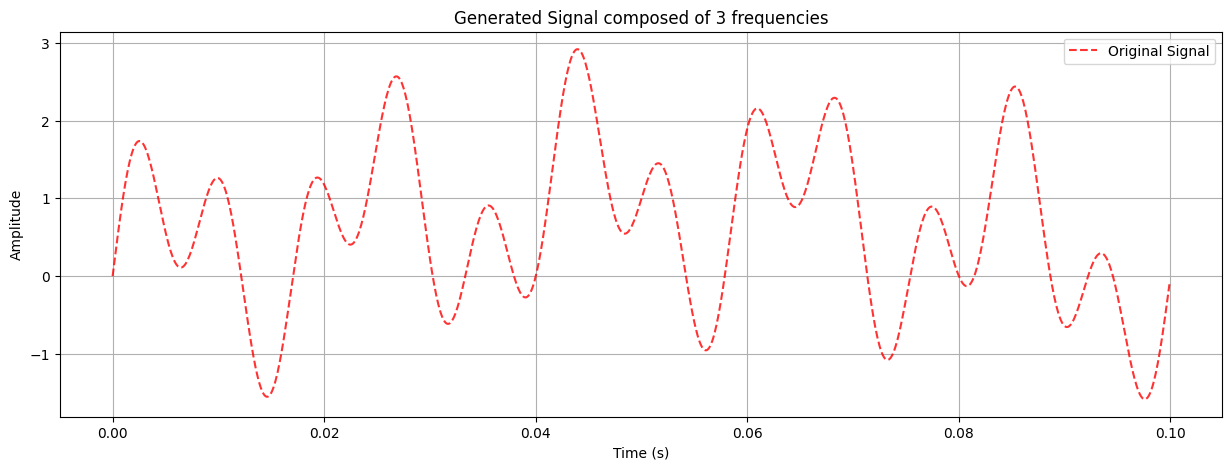

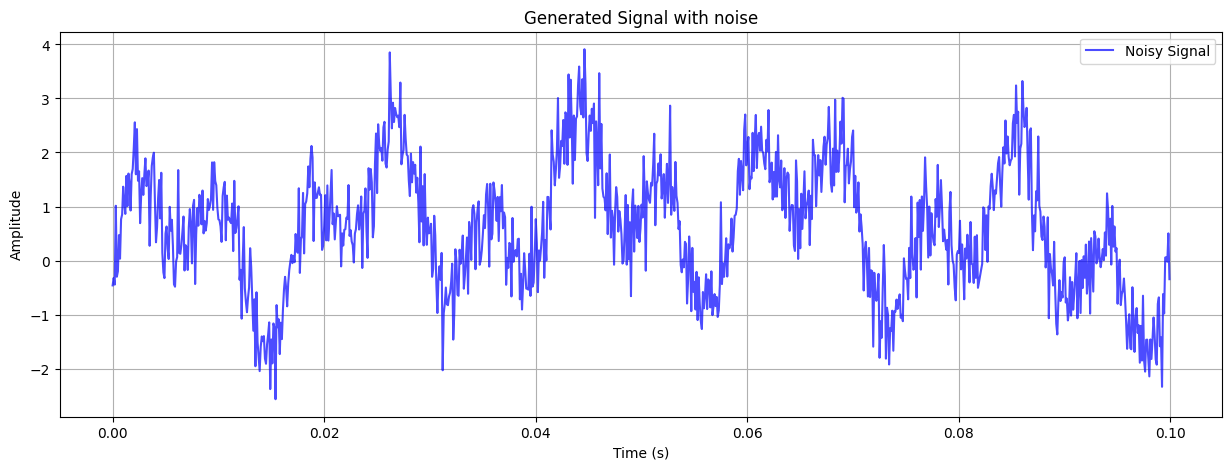

In [100]:
import numpy as np
import matplotlib.pyplot as plt
T_sampling = 1e-4  # Time step (100us)
T_total = 0.1  # Total simulation time (100ms)
n_samples = int(T_total / T_sampling)  # Number of time steps

# Step 2: Generate time vector
t = np.arange(0, T_total, T_sampling)

# Step 2: Define the frequencies of the signal components
freq1 = 5   # Frequency in Hz
freq2 = 50  # Frequency in Hz
freq3 = 120 # Frequency in Hz

# Step 3: Create the base signal as a sum of sinusoids
signal = (
    np.sin(2 * np.pi * freq1 * t) +
    np.sin(2 * np.pi * freq2 * t) +
    np.sin(2 * np.pi * freq3 * t)
)

# Step 4: Add noise to the signal
noise = np.random.normal(0, 0.5, len(t))  # Gaussian noise with mean 0 and std 0.5
noisy_signal = signal + noise

# Step 5: Plot the resulting signal
plt.figure(figsize=(15, 5))
#plt.plot(t, noisy_signal, label='Noisy Signal', color='b', alpha=0.7)
plt.plot(t, signal, label='Original Signal', color='r', linestyle='dashed', alpha=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Generated Signal composed of 3 frequencies')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(t, noisy_signal, label='Noisy Signal', color='b', alpha=0.7)
#plt.plot(t, signal, label='Original Signal', color='r', linestyle='dashed', alpha=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Generated Signal with noise')
plt.legend()
plt.grid(True)
plt.show()

### Filtre de moyenne :
Nous implémenterons un filtre de moyenne glissante en utilisant NumPy. Nous étudierons l'impact de la taille de la fenêtre de moyenne sur la réponse du filtre et sur la réduction du bruit dans les signaux.
- Écrire une fonction qui calcule la moyenne d'un ensemble de valeurs.
- Écrire une fonction qui calcule la moyenne de chaque partie de l'échantillon généré, et tracer le résultat.
- Écrire une fonction qui glisse sur l'échantillon original pour avoir presque le même nombre de points que l'échantillon original. Tracer le résultat : l'échantillon original et celui traité.
- Essayer d'ajuster la position en x du signal traité.
- Modifier le signal original pour qu'il ait une composante périodique qui corresponde exactement à la taille de la moyenne. Observer les résultats.
- Calculer la FFT du signal original et du signal traité et comparer les amplitudes. Observer la forme du bruit, commenter les résultats.

A noter que cette partie a été réalisée et testée partie par partie, c'est pourquoi il y a beaucoup de sections de code.

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# Fonction permettant le calcul de la moyenne des échantillons de chaque segment
def compute_mean(values):
    return np.mean(values)

# Segmentation du signal d'entrée
m, n = 5, 15  
seg1 = array[m:n]  
seg2 = array[m:n]
seg3 = array[m:n]
seg4 = array[m:n]

# Creation d'un tableau de 10 valeurs aléatoires (entre 0 et 10) et calcul de la moyenne de ces valeurs
values = np.random.randint(0,10,size=(1, 10))
mean = compute_mean(values)

# Prints
print("Array of values : ", values)
print("Mean of array : ", mean)

Array of values :  [[5 1 4 4 5 5 3 1 2 6]]
Mean of array :  3.6


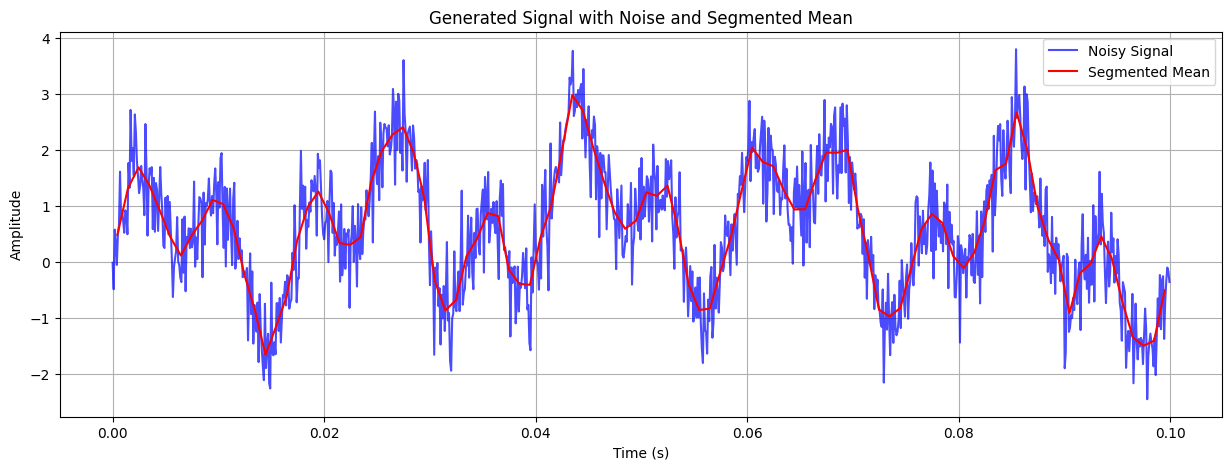

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction permettant de calculer la moyenne d'un segment
def compute_mean(segment):
    return np.mean(segment)

# Fonction permettant de calculer et d'afficher la moyenne des différents segments du signal
def segmented_mean(sample, t, segment_size):
    # Calcul de la moyenne des segments
    means = [compute_mean(sample[i:i+segment_size]) for i in range(0, len(sample), segment_size)]
    
    # Calcul des positions temporelles pour chaque segment
    x_positions = [np.mean(t[i:i+segment_size]) for i in range(0, len(sample), segment_size)]
    
    # Retourner les moyennes et les positions pour les tracer sur le même graphique
    return x_positions, means

# Calcul de la moyenne des segments du signal bruité
segment_size = 10
x_positions, means = segmented_mean(noisy_signal, t, segment_size)

# Tracer les deux courbes sur le même graphique
plt.figure(figsize=(15, 5))

# Tracer le signal bruité
plt.plot(t, noisy_signal, label='Noisy Signal', color='b', alpha=0.7)

# Tracer la moyenne des segments
plt.plot(x_positions, means,  linestyle='-', label='Segmented Mean', color='r')

# Ajouter des labels, un titre et une légende
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Generated Signal with Noise and Segmented Mean')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

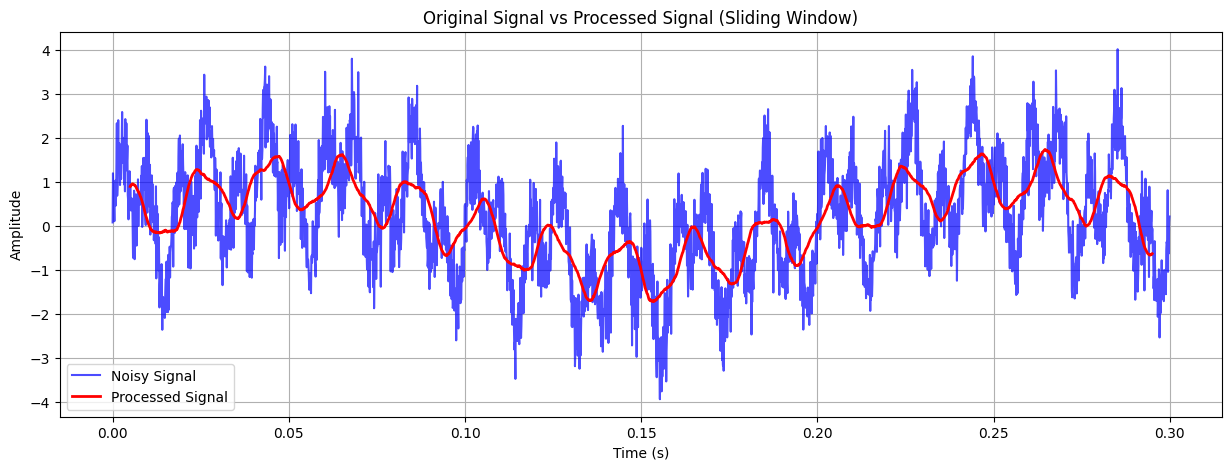

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a time vector
sampling_rate = 10000  # Samples per second
T = 0.3  # Duration in seconds
t = np.arange(0, T, 1/sampling_rate)  # Time vector

# Step 2: Define the frequencies of the signal components
freq1 = 5   # Frequency in Hz
freq2 = 50  # Frequency in Hz
freq3 = 120 # Frequency in Hz

# Step 3: Create the base signal as a sum of sinusoids
signal = (
    np.sin(2 * np.pi * freq1 * t) +
    np.sin(2 * np.pi * freq2 * t) +
    np.sin(2 * np.pi * freq3 * t)
)

# Step 4: Add noise to the signal
noise = np.random.normal(0, 0.5, len(t))  # Gaussian noise with mean 0 and std 0.5
noisy_signal = signal + noise


# Function to apply a sliding window on the signal and return a processed signal
def sliding_window_process(sample, window_size, t):
    processed_signal = []
    
    # Slide the window over the sample signal
    for i in range(len(sample) - window_size + 1):
        # Extract the segment
        segment = sample[i:i + window_size]
        # Compute the mean of the segment
        mean_value = np.mean(segment)
        processed_signal.append(mean_value)
    
    # Adjust the time to match the processed signal (use the center of the window)
    processed_time = t[window_size//2 : len(processed_signal) + window_size//2]  # Ensure size match
    
    return processed_signal, processed_time

# Define the window size for the sliding window approach
window_size = 100

# Process the signal using the sliding window method
processed_signal, processed_time = sliding_window_process(noisy_signal, window_size, t)

# Plot the original noisy signal and the processed signal
plt.figure(figsize=(15, 5))

# Plot the original noisy signal
plt.plot(t, noisy_signal, label='Noisy Signal', color='b', alpha=0.7)

# Plot the processed signal with the adjusted time
plt.plot(processed_time, processed_signal, label='Processed Signal', color='r', linewidth=2)

# Add labels, title, and legend
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Signal vs Processed Signal (Sliding Window)')
plt.legend()
plt.grid(True)
plt.show()

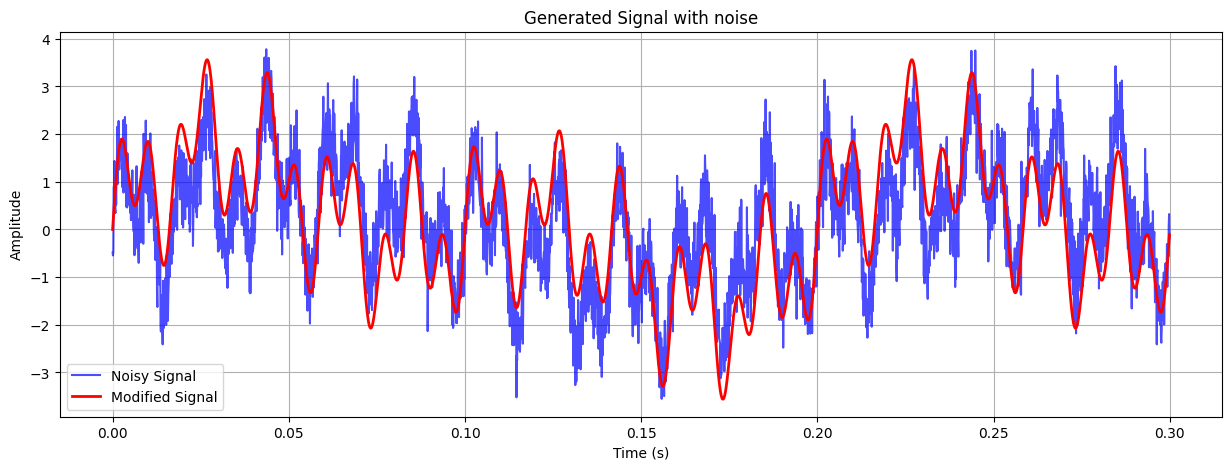

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a time vector
sampling_rate = 10000  # Samples per second
T = 0.3  # Duration in seconds
t = np.arange(0, T, 1/sampling_rate)  # Time vector

# Step 2: Define the frequencies of the signal components
freq1 = 5   # Frequency in Hz
freq2 = 50  # Frequency in Hz
freq3 = 120 # Frequency in Hz
freq4 = 10

# Step 3: Create the base signal as a sum of sinusoids
signal = (
    np.sin(2 * np.pi * freq1 * t) +
    np.sin(2 * np.pi * freq2 * t) +
    np.sin(2 * np.pi * freq3 * t)
)

# Step 4: Add noise to the signal
noise = np.random.normal(0, 0.5, len(t))  # Gaussian noise with mean 0 and std 0.5
noisy_signal = signal + noise

# Calcul de la moyenne des segments du signal bruité
segment_size = 10
x_positions, means = segmented_mean(noisy_signal, t, segment_size)


# Add a periodic component 
# This periodic signal is created to exactly match the segment size
periodic_signal = np.sin(2 * np.pi * freq4 * t)

# Modify the original signal to include this periodic component
modified_signal = signal + periodic_signal

plt.figure(figsize=(15, 5))
plt.plot(t, noisy_signal, label='Noisy Signal', color='b', alpha=0.7)
plt.plot(t, modified_signal, label='Modified Signal', color='r', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Generated Signal with noise')
plt.legend()
plt.grid(True)
plt.show()

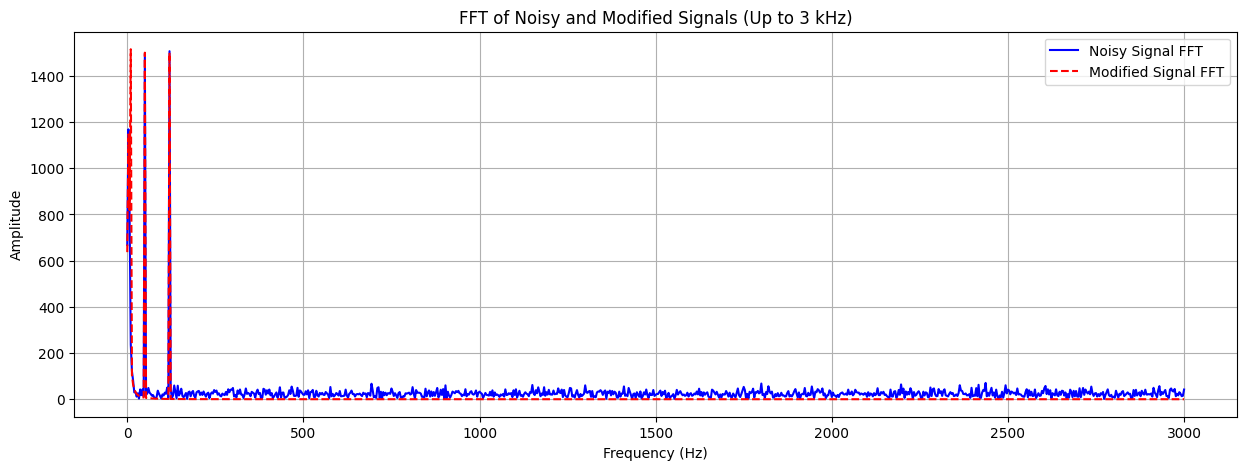

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a time vector
sampling_rate = 10000  # Samples per second
T = 0.3  # Duration in seconds
t = np.arange(0, T, 1/sampling_rate)  # Time vector

# Step 2: Define the frequencies of the signal components
freq1 = 5   # Frequency in Hz
freq2 = 50  # Frequency in Hz
freq3 = 120 # Frequency in Hz
freq4 = 10  # Frequency of the periodic signal

# Step 3: Create the base signal as a sum of sinusoids
signal = (
    np.sin(2 * np.pi * freq1 * t) +
    np.sin(2 * np.pi * freq2 * t) +
    np.sin(2 * np.pi * freq3 * t)
)

# Step 4: Add noise to the signal
noise = np.random.normal(0, 0.5, len(t))  # Gaussian noise with mean 0 and std 0.5
noisy_signal = signal + noise

# Add a periodic component
periodic_signal = np.sin(2 * np.pi * freq4 * t)

# Modify the original signal to include this periodic component
modified_signal = signal + periodic_signal

# Compute the FFT of the noisy signal and the modified signal
noisy_signal_fft = np.fft.fft(noisy_signal)
modified_signal_fft = np.fft.fft(modified_signal)

# Frequency axis for plotting the FFT results
frequencies = np.fft.fftfreq(len(t), 1/sampling_rate)

# Take only the positive half of the frequencies and corresponding FFT values
positive_freqs = frequencies[:len(frequencies)//2]
noisy_signal_fft_amplitude = np.abs(noisy_signal_fft)[:len(frequencies)//2]
modified_signal_fft_amplitude = np.abs(modified_signal_fft)[:len(frequencies)//2]

# Filter frequencies to only include up to 3 kHz
max_freq = 3000  # 3 kHz

# Find the index where the frequency exceeds 3 kHz
freq_index = np.where(positive_freqs > max_freq)[0][0]

# Subset the data to only keep frequencies up to 3 kHz
positive_freqs_filtered = positive_freqs[:freq_index]
noisy_signal_fft_amplitude_filtered = noisy_signal_fft_amplitude[:freq_index]
modified_signal_fft_amplitude_filtered = modified_signal_fft_amplitude[:freq_index]

# Plot the FFT magnitudes of both signals up to 3 kHz
plt.figure(figsize=(15, 5))
plt.plot(positive_freqs_filtered, noisy_signal_fft_amplitude_filtered, label='Noisy Signal FFT', color='b')
plt.plot(positive_freqs_filtered, modified_signal_fft_amplitude_filtered, label='Modified Signal FFT', color='r', linestyle='dashed')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of Noisy and Modified Signals (Up to 3 kHz)')
plt.legend()
plt.grid(True)
plt.show()

## Simulation d'un Filtre RC Passe-Bas Analogique

Ce script simule le comportement d'un filtre RC passe-bas soumis à un échelon de tension d'entrée.  
Il suit les étapes suivantes :

1.  Définir l'équation différentielle du filtre RC et la discrétiser.
2.  Choisir les valeurs de R et C, puis déterminer un pas de temps approprié.
3.  Implémenter une fonction calculant la sortie à chaque pas de temps.
4.  Appliquer un échelon de tension au modèle et enregistrer la sortie.
5.  Tracer le signal d'entrée, le signal filtré et leurs FFT respectives.

Librairies utilisées :
*   `numpy` pour les calculs numériques
*   `matplotlib` pour la visualisation
*   `numpy.fft` pour l'analyse fréquentielle

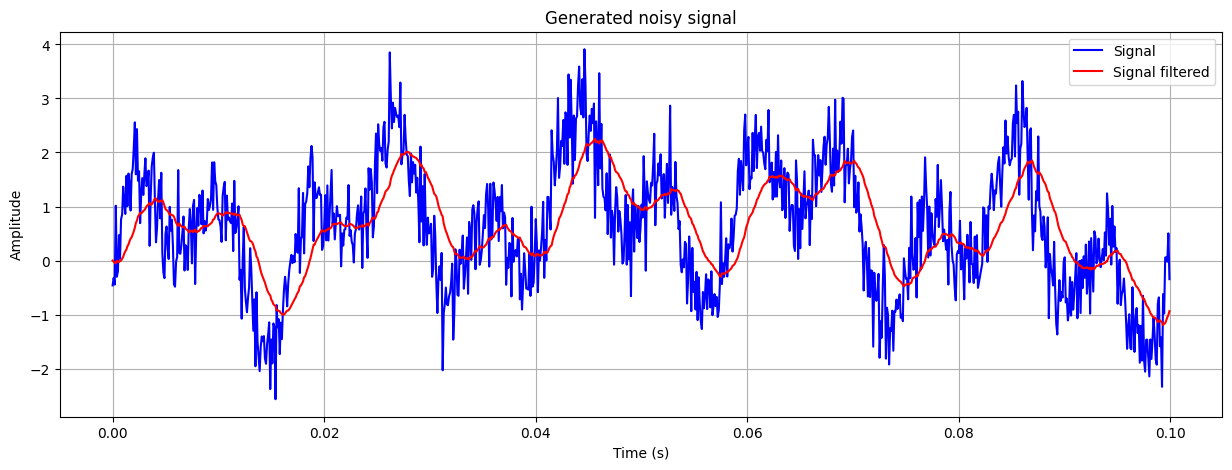

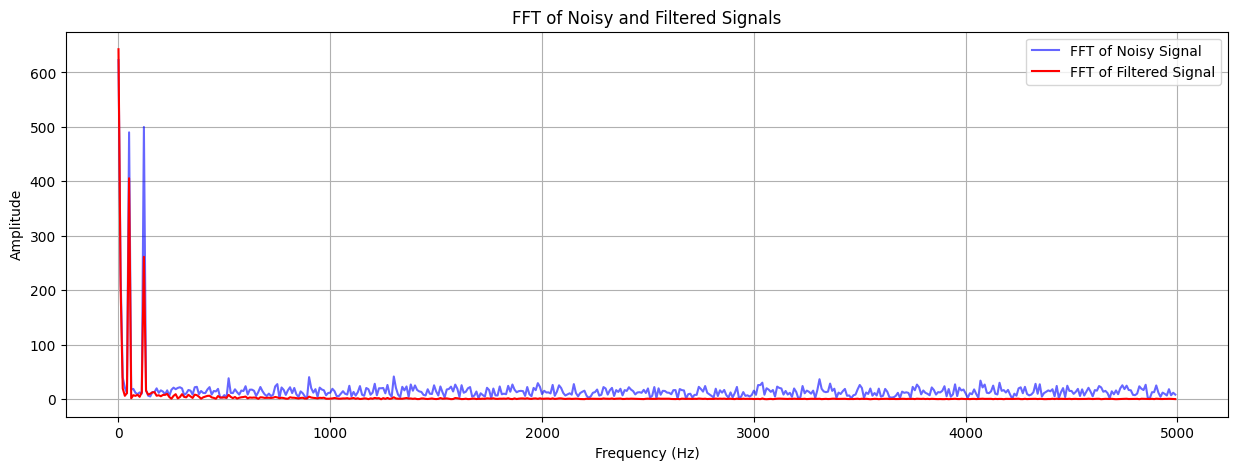

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define RC parameters
R = 1e3  # 1k Ohm
C = 2.2e-6  # 2.2uF

T_sampling = 1e-4  # Time step (100us)
T_total = 0.1  # Total simulation time (100ms)
n_samples = int(T_total / T_sampling)  # Number of time steps

# Step 2: Generate time vector
t = np.arange(0, T_total, T_sampling)

# Step 3: Generate step input signal
Vin = noisy_signal

# Step 4: Initialize output voltage array
Vout_Uc = np.zeros_like(t)

# Step 5: Implement and compute the RC filter model  (Discretisation)
for k in range(1, len(t)):
    Vout_Uc[k] = Vout_Uc[k-1] + (T_sampling / (R * C)) * (Vin[k-1] - Vout_Uc[k-1])

# Step 6: Plot the signal
plt.figure(figsize=(15, 5))
plt.plot(t, Vin, label='Signal', color='b')
plt.plot(t, Vout_Uc, label='Signal filtered', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Generated noisy signal')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Compute FFT for both signals
fft_Vin = np.fft.fft(Vin)
fft_Vout = np.fft.fft(Vout_Uc)
frequencies = np.fft.fftfreq(len(t), T_sampling)  # Compute frequency axis

# Step 8: Plot the FFT of both signals
plt.figure(figsize=(15, 5))
plt.plot(frequencies[:n_samples // 2], np.abs(fft_Vin[:n_samples // 2]), label='FFT of Noisy Signal', color='b', alpha=0.6)
plt.plot(frequencies[:n_samples // 2], np.abs(fft_Vout[:n_samples // 2]), label='FFT of Filtered Signal', color='r')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of Noisy and Filtered Signals')
plt.legend()
plt.grid(True)
plt.show()

Ce TP nous a permis d'explorer les bases du traitement du signal en utilisant Python. Nous avons appris à générer des signaux de test, à implémenter des filtres simples et à simuler le comportement de filtres analogiques.

L'utilisation de bibliothèques comme NumPy, SciPy et Matplotlib s'est avérée essentielle pour manipuler les signaux, effectuer des calculs complexes et visualiser les résultats de manière claire et concise.

L'analyse des signaux dans le domaine fréquentiel via la FFT nous a également donné un aperçu précieux de l'impact des filtres sur les différentes composantes d'un signal. Ce TP constitue une base solide pour aborder des projets plus complexes en traitement du signal et en conception de filtres.